In [1]:
pwd

u'/Users/auroraleport/Documents/LePort_git/Springboard/Kickstarter_capstone'

In [2]:
import pandas as pd
k_data = pd.read_csv('/Users/auroraleport/Documents/Kickstarter_2016-07-15/Kickstarter.csv')

In [3]:
#kd = pd.DataFrame.from_csv('Kickstarter_2016-07-15/Kickstarter.csv', index_col=None,
#                                      parse_dates=['launched_at'], infer_datetime_format=True)
#kd = kd[['category','name','blurb','currency','static_usd_rate','goal','backers_count','state','launched_at','state_changed_at']].head()

In [4]:
#kd.dtypes

In [5]:
# extracting targeted values:
print k_data.columns.values
k_var = k_data[['category','name','blurb','currency','static_usd_rate','goal','backers_count','state','launched_at','state_changed_at']]
print len(k_var)
k_var.head()


['id' 'photo' 'name' 'blurb' 'goal' 'pledged' 'state' 'slug'
 'disable_communication' 'country' 'currency' 'currency_symbol'
 'currency_trailing_code' 'deadline' 'state_changed_at' 'created_at'
 'launched_at' 'staff_pick' 'backers_count' 'static_usd_rate' 'usd_pledged'
 'creator' 'location' 'category' 'profile' 'spotlight' 'urls' 'source_url'
 'friends' 'is_starred' 'is_backing' 'permissions']
4184


,category,name,blurb,currency,static_usd_rate,goal,backers_count,state,launched_at,state_changed_at
0,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",Conceptual Waist Aprons,I’m painting phallic and yonic themed waist ap...,USD,1.000000,300.0,18,successful,1351119645,1353715248
1,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",Mjölby Porslinsrävsmuseum pin,Visa ditt stöd för Mjölby Porslinsrävsmusem me...,SEK,0.121226,3000.0,79,successful,1463392407,1464904800
2,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",COOL DOG ANNUAL STICKER FUND 2016,cool dog is a good dog. he is best conveyed in...,USD,1.000000,3200.0,148,successful,1462554921,1465146921
3,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",USS Coral Sea (CVB/CVA/CV-43) Commemorative Ch...,USS Coral Sea (CVB/CVA/CV 43) commemorative ch...,USD,1.000000,2100.0,56,successful,1437772670,1439068670
4,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",Amrita Bottles Inc.,Amrita is Sanskrit for divine nectar. This bot...,USD,1.000000,1950.0,31,successful,1449811170,1451631540


# Goals:
    # Want to convert blurb to count of words in blurb. (complete)
    # Need to extract category name from category url. (complete)
    # Need to convert launched_at time from Unix time to PST (complete)
    # Need to convert goal amount to USD currency units (complete)
    # Need to extract all states that are live from dataframe (complete)
    # Need to calculate time to state change (state_change - launched_at) (complete)

# Calculating time to state change

In [6]:
import datetime
launch_date = []

for date in k_var['launched_at']:
    new_date = datetime.datetime.fromtimestamp(int(date)).strftime('%Y-%m-%d')
    launch_date.append(new_date)
launch_date = pd.to_datetime(launch_date)

change_date = []
for date in k_var['state_changed_at']:
    new_date2 = datetime.datetime.fromtimestamp(int(date)).strftime('%Y-%m-%d')
    change_date.append(new_date2)
change_date = pd.to_datetime(change_date)

#k_var['days_to_change'] = (pd.to_datetime(change_date['change_date']) - pd.to_datetime(launch_date['launch_date']))

In [7]:
# print k_var.dtypes
k_var['launched_at'] = launch_date
k_var['state_changed_at'] = change_date
k_var['days_to_change'] = (k_var['state_changed_at'] - k_var['launched_at'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

In [8]:
print k_var.dtypes

category                     object
name                         object
blurb                        object
currency                     object
static_usd_rate             float64
goal                        float64
backers_count                 int64
state                        object
launched_at          datetime64[ns]
state_changed_at     datetime64[ns]
days_to_change      timedelta64[ns]
dtype: object


# Converting goal amount to USD currency units:

In [9]:
k_var['goal_USD'] = k_var['goal'] * k_var['static_usd_rate']

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# Converting catgory url to name

In [10]:
import re
category = ''
for item in k_var['category']:
    m = re.search('(?<=/categories/)\w+', item)
    #print m.group(0)
    category += m.group(0) + ','
#print category
category = pd.DataFrame(category.split(','), columns = ['category'])
k_var['category_name'] = category
#k_var.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Converting blurb to count of words in blurb

In [11]:
blurb_count = []
for blurb in k_var['blurb']:
    #print blurb
    try:
        blurb_count.append(len(blurb.split(' ')))
    except:
        blurb_count.append(blurb)
k_var['blurb_count'] = blurb_count
k_var.head()


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,category,name,blurb,currency,static_usd_rate,goal,backers_count,state,launched_at,state_changed_at,days_to_change,goal_USD,category_name,blurb_count
0,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",Conceptual Waist Aprons,I’m painting phallic and yonic themed waist ap...,USD,1.000000,300.0,18,successful,2012-10-24,2012-11-23,30 days,300.00000,art,12.0
1,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",Mjölby Porslinsrävsmuseum pin,Visa ditt stöd för Mjölby Porslinsrävsmusem me...,SEK,0.121226,3000.0,79,successful,2016-05-16,2016-06-02,17 days,363.67812,art,18.0
2,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",COOL DOG ANNUAL STICKER FUND 2016,cool dog is a good dog. he is best conveyed in...,USD,1.000000,3200.0,148,successful,2016-05-06,2016-06-05,30 days,3200.00000,art,28.0
3,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",USS Coral Sea (CVB/CVA/CV-43) Commemorative Ch...,USS Coral Sea (CVB/CVA/CV 43) commemorative ch...,USD,1.000000,2100.0,56,successful,2015-07-24,2015-08-08,15 days,2100.00000,art,20.0
4,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",Amrita Bottles Inc.,Amrita is Sanskrit for divine nectar. This bot...,USD,1.000000,1950.0,31,successful,2015-12-10,2015-12-31,21 days,1950.00000,art,24.0


# Removing states that are live

In [12]:
k_var_state = k_var[k_var['state'] != 'live']
print len(k_var)
print len(k_var_state)
k_var_state.groupby(['state']).size()

4184
4156


state
canceled       535
failed        2917
successful     692
suspended       12
dtype: int64

# Cleaned kickstarter data:

In [13]:
#kick_data = k_var_state.drop(['goal', 'static_usd_rate','currency','category'], axis=1)
kick_data= k_var_state[['name','category_name','blurb','blurb_count','goal_USD','backers_count','launched_at','state_changed_at','days_to_change','state']]
kick_data.head()

,name,category_name,blurb,blurb_count,goal_USD,backers_count,launched_at,state_changed_at,days_to_change,state
0,Conceptual Waist Aprons,art,I’m painting phallic and yonic themed waist ap...,12.0,300.00000,18,2012-10-24,2012-11-23,30 days,successful
1,Mjölby Porslinsrävsmuseum pin,art,Visa ditt stöd för Mjölby Porslinsrävsmusem me...,18.0,363.67812,79,2016-05-16,2016-06-02,17 days,successful
2,COOL DOG ANNUAL STICKER FUND 2016,art,cool dog is a good dog. he is best conveyed in...,28.0,3200.00000,148,2016-05-06,2016-06-05,30 days,successful
3,USS Coral Sea (CVB/CVA/CV-43) Commemorative Ch...,art,USS Coral Sea (CVB/CVA/CV 43) commemorative ch...,20.0,2100.00000,56,2015-07-24,2015-08-08,15 days,successful
4,Amrita Bottles Inc.,art,Amrita is Sanskrit for divine nectar. This bot...,24.0,1950.00000,31,2015-12-10,2015-12-31,21 days,successful


# Goal:
    # Want to automate this process so that I can do this for the other 37 files...

# Get going by asking the following questions and looking for the answers with some code and plots:

    Can you count something interesting?

    Can you find some trends (high, low, increase, decrease, anomalies)?

    Can you make a bar plot or a histogram?

    Can you compare two related quantities?

    Can you make a scatterplot?

    Can you make a time-series plot?


In [14]:
# Can you count something interesting? 
# Looking at number of successful, canceled, live and suspended projects and 
# relative numb of backers per year per state.

g = kick_data[['backers_count','state']].groupby(['state', kick_data['launched_at'].dt.year,]).agg(['size','sum'])
g.unstack('state').fillna(0)

# Will have to divide sum (count of backers) by size (total number of projects) per year, per state 
# to get relative fraction of backers at that point.

backers_count                                               \
                     size                                  sum           
state            canceled failed successful suspended canceled  failed   
launched_at                                                              
2009                  8.0   32.0       12.0       0.0     22.0   221.0   
2010                 33.0   97.0       26.0       0.0    102.0   740.0   
2011                 36.0  208.0       96.0       2.0     82.0  1494.0   
2012                 59.0  357.0      122.0       0.0    327.0  3006.0   
2013                 50.0  369.0      120.0       0.0    330.0  3514.0   
2014                128.0  698.0      130.0       0.0    565.0  3527.0   
2015                152.0  870.0      139.0       9.0   1394.0  3611.0   
2016                 69.0  286.0       47.0       1.0    362.0  1817.0   

                                  
                                  
state       successful suspended  
launched_at                       
2009             539.0       0.0  
2010            1171.0       0.0  
2011            4953.0       4.0  
2012            9775.0       0.0  
2013           13257.0       0.0  
2014            9583.0       0.0  
2015           16178.0       5.0  
2016            2728.0       0.0

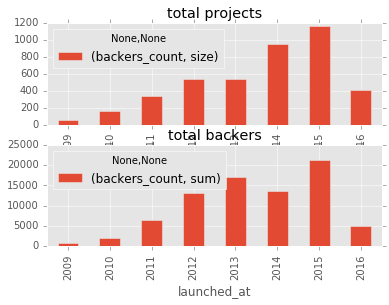

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
# Can you find some trends (high, low, increase, decrease, anomalies)?
# Looking at number of projects launched per year and number of backers per year across all 
# states.

g_size = kick_data[['backers_count']].groupby([kick_data['launched_at'].dt.year,]).agg(['size'])
g_sum = kick_data[['backers_count']].groupby([kick_data['launched_at'].dt.year,]).agg(['sum'])

fig, axes = plt.subplots(nrows=2, ncols=1)
g_size.plot(ax=axes[0], kind= 'bar'); axes[0].set_title('total projects'); #plt.legend(loc='best')
g_sum.plot(ax=axes[1], kind = 'bar'); axes[1].set_title('total backers'); #plt.legend(loc='best')


# Conclusion: 1. There is not an equal number of projects or backers across years.
#             2. Number of backers and number of projects logicaly seem to correlate
#             3. As there are different number of projects launched per year, it is 
#                plausable that year has an effect on state of project and/or number of backers.
#             SOLUTION: Choose projects from recent years (2014-2016)

# Can you make a time-series plot?

# will want to limit data to only 2014 and 2014 projects (aka recent)

state
canceled       535
failed        2917
live            28
successful     692
suspended       12
dtype: int64


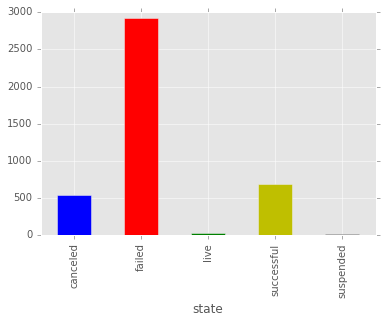

In [16]:
# Can you make a bar plot or a histogram?
# number of project per state over all years: will use k_var bc kick_data does not have live data in it.
# Conclustion: most projects, regardless of year, end up failing. 

%matplotlib inline
from matplotlib import pyplot as plt
from itertools import cycle, islice

my_colors = list(islice(cycle(['b', 'r', 'g', 'y','k']), None, len(k_var)))
g = k_var.groupby(['state']).size()
print g
g.plot(kind='bar', stacked = True, color=my_colors)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


state        canceled  failed  successful
launched_at                              
2009                8      32          12
2010               33      97          26
2011               36     208          96
2012               59     357         122
2013               50     369         120
2014              128     698         130
2015              152     870         139
2016               69     286          47


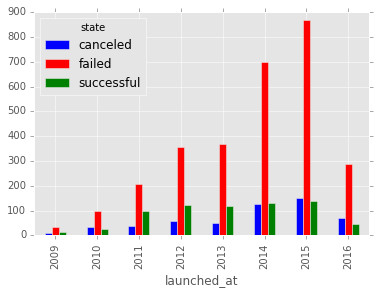

In [17]:
# number of projects per state, per year: (kickstarter was launched, on April 28, 2009)

# want to get percentage of backers per state per year...
# (% will account for variation in # of projects per year, per state)

from matplotlib import pyplot as plt
from itertools import cycle, islice

#excluding live and suspended projects from the dataset:
my_colors = list(islice(cycle(['b', 'r', 'g']), None, len(k_var)))
g = k_var[k_var.state != 'live'][k_var.state != 'suspended'].groupby([k_var['launched_at'].dt.year, 'state']).size()
g = g.unstack().fillna(0)
print g #raw counts
g.plot(kind='bar', color=my_colors)

In [18]:
# seems like 2016 - 2014 is current
# what may be driving this 2x increase in kickstarter:
    # increased popularity 

            backers_count                  
state            canceled failed successful
launched_at                                
2009                   22    221        539
2010                  102    740       1171
2011                   82   1494       4953
2012                  327   3006       9775
2013                  330   3514      13257
2014                  565   3527       9583
2015                 1394   3611      16178
2016                  362   1817       2728


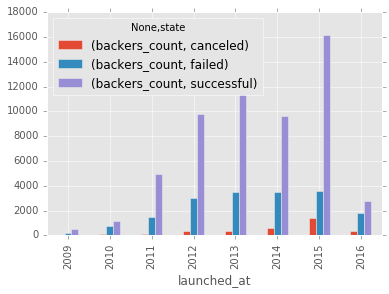

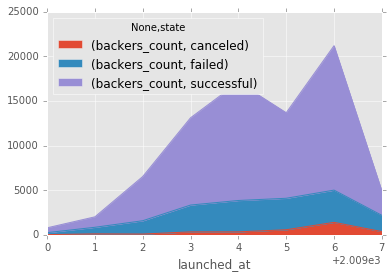

In [19]:
# Number of backers per year per state 

kick_data_state = kick_data[kick_data.state != 'suspended']#[kick_data_state['launched_at'].dt.year != 2016]
g = kick_data_state[['backers_count','state','launched_at']].groupby(['state', kick_data_state['launched_at'].dt.year]).sum()
g = g.unstack('state')
print g
g.plot(kind='bar')
g.plot(kind='area')

#kick_data_state.dtypes

In [20]:
kick_data_state.groupby([kick_data_state['launched_at'].dt.year]).count()

,name,category_name,blurb,blurb_count,goal_USD,backers_count,launched_at,state_changed_at,days_to_change,state
launched_at,,,,,,,,,,
2009,52,52,52,52,52,52,52,52,52,52
2010,156,156,156,156,156,156,156,156,156,156
2011,339,340,339,339,340,340,340,340,340,340
2012,538,538,537,537,538,538,538,538,538,538
2013,539,539,539,539,539,539,539,539,539,539
2014,956,956,956,956,956,956,956,956,956,956
2015,1161,1161,1160,1160,1161,1161,1161,1161,1161,1161
2016,402,402,402,402,402,402,402,402,402,402


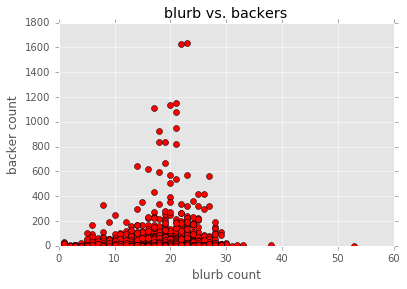

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Can you compare two related quantities? 
    # Does number of backers correlate with number of words in blurb? linear regression
    # Does number of backers correlate with state? logistic regression

# Can you make a scatterplot?
 
fig = plt.figure(figsize=(5, 4))
fig, ax = plt.subplots()

x = kick_data[['blurb_count']]
y = kick_data[['backers_count']]
ax.set_title("blurb vs. backers")
ax.set_xlabel("blurb count")
ax.set_ylabel("backer count")

plt.plot(x, y, 'o', color='red')

In [22]:
kick_corr = pd.DataFrame({'blurb count': kick_data['blurb_count'], 
                        'backer count': kick_data['backers_count']})
kick_corr.corr(method='pearson')

,backer count,blurb count
backer count,1.000000,0.013844
blurb count,0.013844,1.000000


In [23]:
#kick_data[kick_data.backers_count != 0]
#kick_data[(kick_data.state == 'successful')]

In [24]:
print kick_data_state["state"].head()
print kick_data_state["state"].tail()

0    successful
1    successful
2    successful
3    successful
4    successful
Name: state, dtype: object
4179    failed
4180    failed
4181    failed
4182    failed
4183    failed
Name: state, dtype: object


In [25]:
# Removing supspended and limiting dataset to recent years
kick_data_state = kick_data[kick_data.state != 'suspended'][kick_data['launched_at'].dt.year >= 2014]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


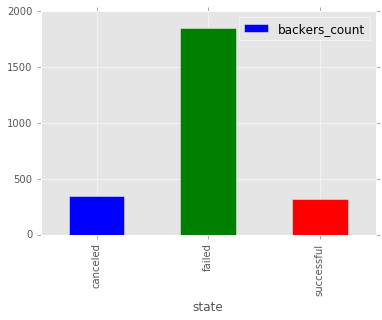

In [26]:
g = kick_data_state[['backers_count','state']].groupby(['state']).count()
my_colors = list(islice(cycle(['b', 'g', 'r']), None, len(kick_data_state[['state']])))
g.plot(kind = 'bar', color = my_colors)

# Logistic Regression 1

In [27]:
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from sklearn import linear_model
from sklearn import preprocessing

# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert State variable to numeric
encoded_state = label_encoder.fit_transform(kick_data_state["state"])
print encoded_state

# Initialize logistic regression model
log_model = linear_model.LogisticRegression()

# Train the model
log_model.fit(X = pd.DataFrame(kick_data_state.backers_count.reset_index(drop=True)),
              y = pd.DataFrame(encoded_state))

# Check trained model intercept
print log_model.intercept_

# Check trained model coefficients
print log_model.coef_

kick_corr2 = pd.DataFrame({'state': encoded_state, 
                        'backer count': kick_data_state['backers_count']})
kick_corr2.corr(method='pearson')

[2 2 2 ..., 1 1 1]
[-1.71871925  1.55829751 -3.08509501]
[[-0.01100333]
 [-0.04777349]
 [ 0.0686825 ]]


//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,backer count,state
backer count,1.000000,0.297537
state,0.297537,1.000000


# Logistic Regression 2

In [46]:
# Logistic Regression: backers_count and state
from patsy import dmatrices

dta = kick_data_state

encoded_state = label_encoder.fit_transform(kick_data_state["state"])
kick_data_state['encoded_state'] = encoded_state

y, X = dmatrices('encoded_state ~ 1 + backers_count', kick_data_state, return_type="dataframe")
print X.columns

#kick_data_state
#print kick_data_state.columns
#kick_data_state[(kick_data_state.encoded_state == 2)]

Index([u'Intercept', u'backers_count'], dtype='object')


In [29]:
y = np.ravel(y)
y

array([ 2.,  2.,  2., ...,  1.,  1.,  1.])

In [47]:
from sklearn.linear_model import LogisticRegression

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.78840809845176663

In [48]:
# what percentage...are not state 0? came from example where affairs = 1 and no affairs = 0?
y.mean()

encoded_state    0.9869
dtype: float64

In [49]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,"[-0.861020071424, 0.780430190827, -1.5503094567]"
1,backers_count,"[-0.0109309523929, -0.0478501502762, 0.0690744..."


In [33]:
from sklearn.cross_validation import train_test_split
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [34]:
predicted = model2.predict(X_test)
print predicted

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.
  1.  1.  1.  2.  1.  2.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.
  1.  2.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.
  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.
  1.  2.  1.  1.  2.  2.  1.  1.  1.  1.  1.  2.  1.  1.  1.  2.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1

In [35]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print probs

[[ 0.14206657  0.81218839  0.04574504]
 [ 0.12901684  0.58129281  0.28969035]
 [ 0.14239236  0.81507686  0.04253079]
 ..., 
 [ 0.14239236  0.81507686  0.04253079]
 [ 0.14239236  0.81507686  0.04253079]
 [ 0.14239236  0.81507686  0.04253079]]


In [36]:
from sklearn import metrics
# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)
#print metrics.roc_auc_score(y_test, probs[:, 1])

0.776455026455


In [37]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[  0 107   5]
 [  0 542  12]
 [  0  45  45]]
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       112
        1.0       0.78      0.98      0.87       554
        2.0       0.73      0.50      0.59        90

avg / total       0.66      0.78      0.71       756



//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
#trying 10-fold cross-validation, to see if the accuracy holds up more rigorously.

from sklearn.cross_validation import cross_val_score
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.81027668  0.76284585  0.75098814  0.77075099  0.82142857  0.81746032
  0.80876494  0.81673307  0.74501992  0.776     ]
0.788026847725


In [39]:
# predicting the probability of a cancle/fail/success for a project not in the dataset

print list(label_encoder.inverse_transform([0,1,2]))

model.predict_proba(np.array([0,50])) #first value is the intercept

['canceled', 'failed', 'successful']


array([[ 0.15943775,  0.1348532 ,  0.70570905]])

In [40]:
model.predict_proba(np.array([1,50]))

array([[ 0.09524149,  0.30809538,  0.59666313]])

In [41]:
model.predict_proba(np.array([2,50]))

array([[ 0.05505688,  0.64014628,  0.30479684]])

# Are there repeates in data from sub-directories?? ...Yes!

In [335]:
k_data1 = pd.read_csv('Kickstarter_2016-07-15/Kickstarter038.csv')

print k_data1.columns.values
k_var1 = k_data1[['name','blurb','launched_at','state_changed_at','state']]
k_var1.head()
len(k_var1)

['id' 'photo' 'name' 'blurb' 'goal' 'pledged' 'state' 'slug'
 'disable_communication' 'country' 'currency' 'currency_symbol'
 'currency_trailing_code' 'deadline' 'state_changed_at' 'created_at'
 'launched_at' 'staff_pick' 'backers_count' 'static_usd_rate' 'usd_pledged'
 'creator' 'location' 'category' 'profile' 'spotlight' 'urls' 'source_url'
 'friends' 'is_starred' 'is_backing' 'permissions']


3998

In [38]:
import datetime
launch_date1 = []

for date in k_var1['launched_at']:
    new_date = datetime.datetime.fromtimestamp(int(date)).strftime('%Y-%m-%d')
    launch_date1.append(new_date)
launch_date1 = pd.to_datetime(launch_date1)

change_date1 = []
for date in k_var1['state_changed_at']:
    new_date2 = datetime.datetime.fromtimestamp(int(date)).strftime('%Y-%m-%d')
    change_date1.append(new_date2)
change_date1 = pd.to_datetime(change_date1)

In [39]:
k_var1['launched_at'] = launch_date1
k_var1['state_changed_at'] = change_date1
k_var1['days_to_change'] = (k_var1['state_changed_at'] - k_var1['launched_at'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [41]:
frames = [k_var, k_var1]
k_var_concat = pd.concat(frames)
g = k_var_concat.groupby(['blurb'])

size = g.size()
size[size > 1].head()

blurb
"3 Days In Savannah" explores the issues of love, racism, and regret while reminding us that, "life is a game and love is the prize."      2
"MAMA'Z BA-B" is the story of Marcus Williams who struggles to find a place for himself as a young black male.                             2
Andrew Heller producing a production of an original play for the Philadelphia Fringe Festival. Written and Directed by Andrew Heller       2
As part of the 450th anniversary of St. Augustine's founding, our art group will paint a mural depicting the town's landmark & history.    2
Buy prints, playmats and limited edition canvases from Magic: The Gathering artist Peter Mohrbacher.                                       2
dtype: int64

In [315]:
k_var_concat.head()

,backers_count,blurb,blurb_count,category,category_name,currency,days_to_change,goal,goal_USD,launched_at,name,state,state_changed_at,static_usd_rate
0,18.0,I’m painting phallic and yonic themed waist ap...,12.0,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",art,USD,30 days,300.0,300.00000,2012-10-24,Conceptual Waist Aprons,successful,2012-11-23,1.000000
1,79.0,Visa ditt stöd för Mjölby Porslinsrävsmusem me...,18.0,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",art,SEK,17 days,3000.0,363.67812,2016-05-16,Mjölby Porslinsrävsmuseum pin,successful,2016-06-02,0.121226
2,148.0,cool dog is a good dog. he is best conveyed in...,28.0,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",art,USD,30 days,3200.0,3200.00000,2016-05-06,COOL DOG ANNUAL STICKER FUND 2016,successful,2016-06-05,1.000000
3,56.0,USS Coral Sea (CVB/CVA/CV 43) commemorative ch...,20.0,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",art,USD,15 days,2100.0,2100.00000,2015-07-24,USS Coral Sea (CVB/CVA/CV-43) Commemorative Ch...,successful,2015-08-08,1.000000
4,31.0,Amrita is Sanskrit for divine nectar. This bot...,24.0,"{""urls"":{""web"":{""discover"":""http://www.kicksta...",art,USD,21 days,1950.0,1950.00000,2015-12-10,Amrita Bottles Inc.,successful,2015-12-31,1.000000


In [44]:
# people can resubmit their projects a 2nd, 3rd etc. time...So there are repeates.
# Therefore, for this dataset maybe we should only analyze the 1st submissions.

g[['blurb','launched_at','state_changed_at','days_to_change','state']].filter(lambda x: len(x) > 1).sort_values('blurb')

,blurb,launched_at,state_changed_at,days_to_change,state
1060,"""3 Days In Savannah"" explores the issues of lo...",2014-07-02,2014-07-04,2 days,successful
801,"""3 Days In Savannah"" explores the issues of lo...",2014-06-14,2014-07-01,17 days,failed
811,"""MAMA'Z BA-B"" is the story of Marcus Williams ...",2015-01-16,2015-02-15,30 days,failed
857,"""MAMA'Z BA-B"" is the story of Marcus Williams ...",2015-02-18,2015-04-19,60 days,failed
858,Andrew Heller producing a production of an ori...,2016-02-13,2016-04-13,60 days,failed
489,Andrew Heller producing a production of an ori...,2016-02-13,2016-02-13,0 days,canceled
3649,As part of the 450th anniversary of St. August...,2012-10-10,2012-12-09,60 days,failed
1686,As part of the 450th anniversary of St. August...,2012-10-04,2012-10-05,1 days,canceled
1076,"Buy prints, playmats and limited edition canva...",2014-06-25,2014-07-25,30 days,successful
1097,"Buy prints, playmats and limited edition canva...",2013-11-13,2013-12-13,30 days,successful
